Let's start by import the necessary packages.

In [ ]:
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
#from keras.preprocessing.image import img_to_array
from keras.layers import Input
from keras.models import Model
from keras.preprocessing import image
from keras.utils import load_img, img_to_array
import keras.utils as image
from keras.applications import imagenet_utils
from PIL import Image
import numpy as np
import io
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import copy
import time
import random

Let's go to connect your drive for use the database

In [ ]:
# !echo fait l'affaire de print
!echo "Downloading 101_Object_Categories for image notebooks"
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Let's quickly look at a few sample images from our dataset.

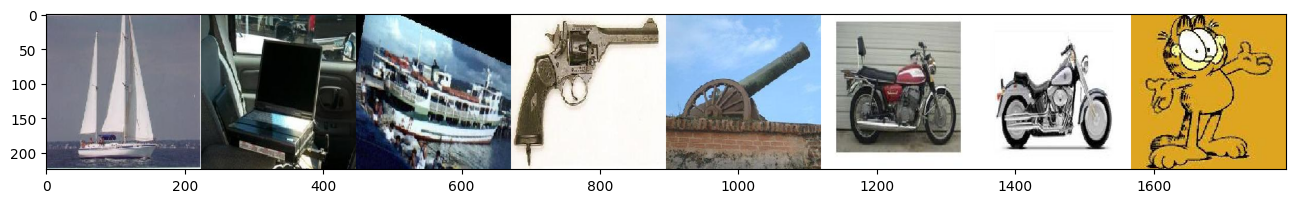

In [ ]:
images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(root) for f in filenames if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
idx = [int(len(images) * random.random()) for i in range(8)]
imgs = [load_img(images[i], target_size=(224, 224)) for i in idx]
concat_image = np.concatenate([np.asarray(img) for img in imgs], axis=1)
plt.figure(figsize=(16,4))
plt.imshow(concat_image)

Read Caltech Database Categories

In [ ]:
import os
root = '/content/drive/MyDrive/101_ObjectCategories'


categories = [x[0] for x in os.walk(root) if x[0]][1:]
#categories = [c for c in categories if c not in [os.path.join(root, e) for e in exclude]]
print(categories)
root_dir = root

['/content/drive/MyDrive/101_ObjectCategories/wild_cat', '/content/drive/MyDrive/101_ObjectCategories/yin_yang', '/content/drive/MyDrive/101_ObjectCategories/wheelchair', '/content/drive/MyDrive/101_ObjectCategories/tick', '/content/drive/MyDrive/101_ObjectCategories/trilobite', '/content/drive/MyDrive/101_ObjectCategories/umbrella', '/content/drive/MyDrive/101_ObjectCategories/wrench', '/content/drive/MyDrive/101_ObjectCategories/water_lilly', '/content/drive/MyDrive/101_ObjectCategories/watch', '/content/drive/MyDrive/101_ObjectCategories/windsor_chair', '/content/drive/MyDrive/101_ObjectCategories/snoopy', '/content/drive/MyDrive/101_ObjectCategories/soccer_ball', '/content/drive/MyDrive/101_ObjectCategories/stegosaurus', '/content/drive/MyDrive/101_ObjectCategories/sunflower', '/content/drive/MyDrive/101_ObjectCategories/stop_sign', '/content/drive/MyDrive/101_ObjectCategories/sea_horse', '/content/drive/MyDrive/101_ObjectCategories/strawberry', '/content/drive/MyDrive/101_ObjectCa

This function is useful for pre-processing the

data into an image and input vector.

In [ ]:
# helper function to load image and return it and input vector
def get_image(path):
    img = image.load_img(path, target_size=(299, 299))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

Count the number of classes in the database

In [ ]:
data = []
for c, category in enumerate(categories):
    images = [os.path.join(dp, f) for dp, dn, filenames
              in os.walk(category) for f in filenames
              if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
    for img_path in images:
        img, x = get_image(img_path)
        data.append({'x':np.array(x[0]), 'y':c})

# count the number of classes
num_classes = len(categories)
print(num_classes)

167


Load all the images from root folder

In [ ]:
%matplotlib inline

import os

#if using Theano with GPU
#os.environ["KERAS_BACKEND"] = "tensorflow"

import random
import numpy as np
import keras

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model

In [ ]:
def extract_features(img_path, model):
    input_shape = (299, 299, 3)
    img = image.load_img(img_path,
                         target_size=(input_shape[0], input_shape[1]))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / norm(flattened_features)
    return normalized_features
    return features

Let's make a handy function to recursively get all the image files under a root directory.

In [ ]:
extensions = ['.jpg', '.JPG', '.jpeg', '.JPEG', '.png', '.PNG']

def get_file_list(root_dir):
    file_list = []
    for root, directories, filenames in os.walk(root_dir):
        for filename in filenames:
            if any(ext in filename for ext in extensions):
                file_list.append(os.path.join(root, filename))
    return file_list

We will define a pretrained model

In [ ]:
model = InceptionResNetV2(weights='imagenet', include_top=False,
  classes = 1000)
model_ar = model
model.summary()

219055592/219055592 [==============================] - 4s 0us/step
Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d (Conv2D)                (None, None, None,   864         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization (BatchNorm  (None, None, None,   96         ['conv2d[0][0]']                 
 alization)  

tqdm_notebook is a function in the Python TQDM library, which is used to display a progress bar in notebook environments, such as Jupyter Notebook or Google Colab. This feature is particularly useful when you are running loops or long operations and want to visually track the progress of your code.

In [ ]:
from tqdm import tqdm_notebook
tqdm.pandas()

Now, let's run the extraction over the entire dataset and time it.

In [ ]:
import sys
from tqdm import tqdm_notebook as tqdm

# path to the your datasets
root_dir = '/content/drive/MyDrive/Colab Notebooks/101_ObjectCategories'
filenames = sorted(get_file_list(root_dir))

feature_list = []
for i in tqdm_notebook(range(len(filenames))):
    feature_list.append(extract_features(filenames[i], model))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':


In [ ]:
feature_list = np.asarray(feature_list)
feature_list.shape

(8677, 1, 8, 8, 1536)

Now let's try the same with the Keras Image Generator functions. to rescale the image data into float values (divide by 255 so the tensor values are between 0 and 1)

In [ ]:
import math
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size = 64
datagen = tensorflow.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)
generator = datagen.flow_from_directory(root_dir, target_size=(299, 299), batch_size=batch_size, class_mode=None, shuffle=False)
num_images = len(generator.filenames)
num_epochs = int(math.ceil(num_images / batch_size))
start_time = time.time()
feature_list = []
feature_list = model_ar.predict_generator(generator, num_epochs)
end_time = time.time()

Found 9144 images belonging to 102 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
for i, features in enumerate(feature_list):
    feature_list[i] = features / norm(features)

feature_list = feature_list.reshape(num_images, -1)
print("Num images   = ", len(generator.classes))
print("Shape of feature_list = ", feature_list.shape)
print("Time taken in sec = ", end_time - start_time)

Num images   =  9144
Shape of feature_list =  (9144, 98304)
Time taken in sec =  47.77150917053223


Let's save the features as intermediate files to use later.

In [ ]:
filenames = [root_dir + '/' + s for s in generator.filenames]